# Camera Calibration
Here we will read in 20 chessboard images for calibrating our camera.

In [16]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


CAL_IMAGES_DIR = './camera_cal/'
TEST_IMAGES_DIR = './test_images/'
X_DIM = 9
Y_DIM = 6


def get_images(dir):
    """Returns all the images in a directory as a list"""
    return [mpimg.imread(dir + image) for image in os.listdir(dir)]


def compute_cal_points(images, x_dim=X_DIM, y_dim=Y_DIM):
    """Returns a tuple that contains (object points, image points)"""
    objp = np.zeros((x_dim*y_dim, 3), np.float32)
    objp[:,:2] = np.mgrid[0:x_dim, 0:y_dim].T.reshape(-1,2)
    
    objpoints, imgpoints = [], []
    
    for image in images:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (x_dim, y_dim), None)
        
        if ret:
            imgpoints.append(corners)
            objpoints.append(objp)
            
    return (objpoints, imgpoints)


def undistort(image, objpoints, imgpoints):
    """Returns an undistorted image withthe given objpoints and imgpoints"""
    image_shape = (image.shape[1], image.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_shape, None, None)
    
    return cv2.undistort(image, mtx, dist, None, mtx)


cal_images = get_images(CAL_IMAGES_DIR)
objpoints, imgpoints = compute_cal_points(cal_images)

Here we can see a distorted image and an undistorted image below it

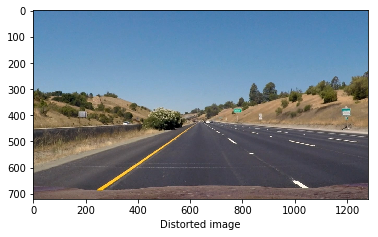

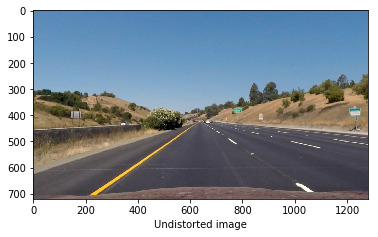

In [20]:
test_images = get_images(TEST_IMAGES_DIR)
undistorted_img = undistort(test_images[0], objpoints, imgpoints)
plt.xlabel('Distorted image')
plt.imshow(test_images[0])
plt.show()
plt.xlabel('Undistorted image')
plt.imshow(undistorted_img)
plt.show()